In [1]:
import requests
import pandas as pd

# Configure sua chave de API da The MovieDB
api_key = "a7f24cabb8f937997c2058a26643f61a"

# Número total de filmes que você deseja obter
total_filmes = 100

# Número de filmes por página (máximo: 20)
filmes_por_pagina = 20

# Calcula o número total de páginas necessárias
num_paginas = (total_filmes + filmes_por_pagina - 1) // filmes_por_pagina

# Lista para armazenar os dados de cada filme
filmes_data = []

# Loop pelas páginas para obter os dados de cada filme
for page in range(1, num_paginas + 1):
    # URL da API para obter os detalhes dos filmes
    url = f"https://api.themoviedb.org/3/discover/movie?api_key={api_key}&page={page}&sort_by=popularity.desc"
    
    # Fazendo a requisição à API
    response = requests.get(url)
    
    # Verifica se a resposta foi bem-sucedida
    if response.status_code == 200:
        # Extrai os dados dos filmes da resposta JSON
        filmes_page = response.json()["results"]
        
        # Adiciona os dados dos filmes à lista filmes_data
        filmes_data.extend(filmes_page)

# Verifica se foram obtidos dados de filmes
if len(filmes_data) > 0:
    # Cria uma lista com os dados dos filmes selecionados
    data = {
        "id": [],  # Adiciona a chave "id" no dicionário
        "Título": [],
        "Visão geral": [],
        "Avaliação média": [],
        "Gêneros": []
    }

    for i, filme in enumerate(filmes_data, start=1):
        # Verifica se o filme tem informações de gênero disponíveis
        if "genres" in filme and isinstance(filme["genres"], list):
            data["id"].append(i)  # Adiciona o valor do id
            data["Título"].append(filme.get("title", ""))
            data["Visão geral"].append(filme.get("overview", ""))
            data["Avaliação média"].append(filme.get("vote_average", 0))
            data["Gêneros"].append([genre["name"] for genre in filme["genres"]])
        else:
            data["id"].append(i)  # Adiciona o valor do id
            data["Título"].append(filme.get("title", ""))
            data["Visão geral"].append(filme.get("overview", ""))
            data["Avaliação média"].append(filme.get("vote_average", 0))
            data["Gêneros"].append('')  # Preenche com uma string vazia

    # Cria o DataFrame com os dados dos filmes
    df = pd.DataFrame(data)
    
    # Reordena as colunas para colocar "id" antes de "Título"
    df = df[['id', 'Título', 'Visão geral', 'Avaliação média', 'Gêneros']]

    # Salva os dados em um arquivo CSV
    df.to_csv("/Users/batistajunior/Downloads/filmes.csv", index=False)
    
    print("Dados dos filmes salvos com sucesso em filmes.csv.")
else:
    print("Nenhum dado de filme obtido.")


Dados dos filmes salvos com sucesso em filmes.csv.


In [2]:
# Exibe o DataFrame com os dados dos filmes
display(df)


,id,Título,Visão geral,Avaliação média,Gêneros
0,1,John Wick: Chapter 4,"With the price on his head ever increasing, Jo...",8.0,
1,2,The Super Mario Bros. Movie,"While working underground to fix a water main,...",7.8,
2,3,Fast X,Over many missions and against impossible odds...,7.1,
3,4,The Little Mermaid,"The youngest of King Triton’s daughters, and t...",6.1,
4,5,Evil Dead Rise,Three siblings find an ancient vinyl that give...,7.1,
...,...,...,...,...,...
95,96,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,Tanjiro finds his family slaughtered and the l...,7.9,
96,97,Assassin Club,"In this world of contract killers, Morgan Gain...",6.6,
97,98,The Devil Conspiracy,The hottest biotech company in the world has d...,6.4,
98,99,Prey for the Devil,In response to a global rise in demonic posses...,7.1,


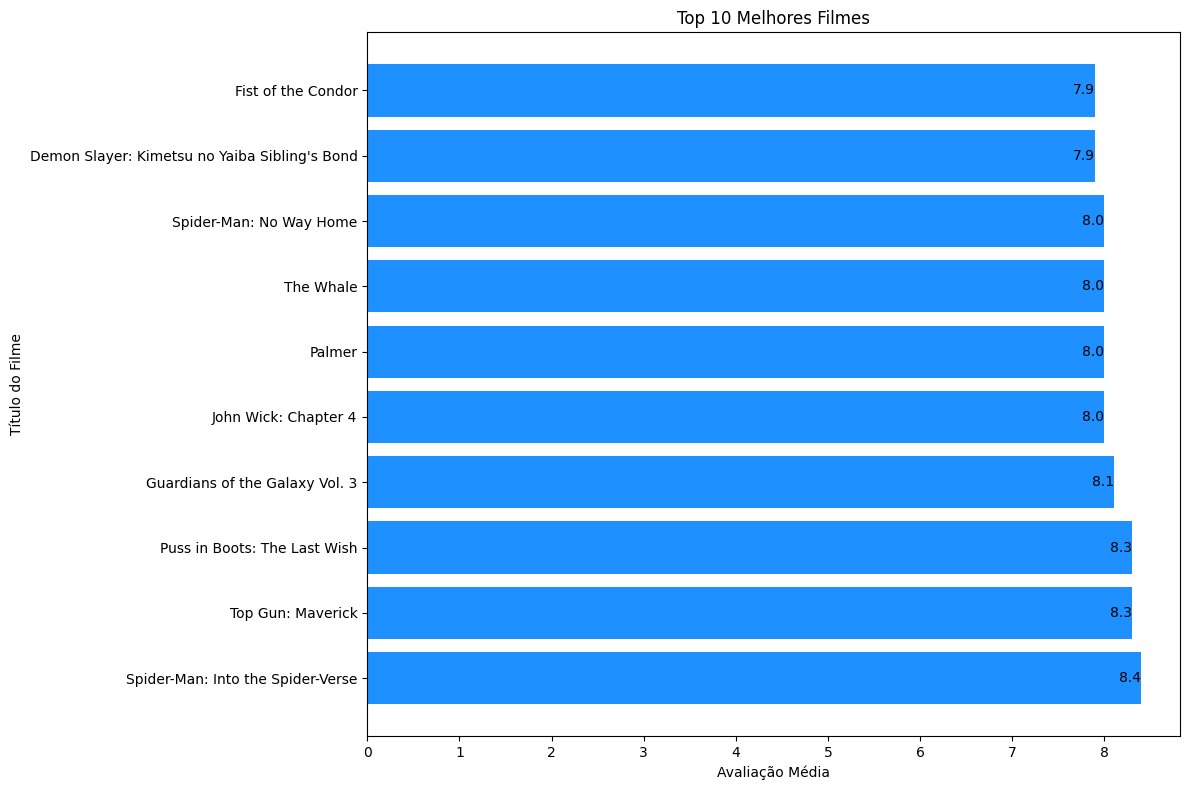

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
df = pd.read_csv("/Users/batistajunior/Downloads/filmes.csv")

# Ordenar os filmes pela avaliação média em ordem decrescente
df = df.sort_values("Avaliação média", ascending=False)

# Selecionar apenas os top 10 filmes com a melhor avaliação média
top_10_filmes = df.head(10)

# Configurar o gráfico
plt.figure(figsize=(12, 8))
plt.barh(top_10_filmes["Título"], top_10_filmes["Avaliação média"], color='dodgerblue')

# Adicionar os números correspondentes à avaliação média como rótulos das barras
for i, (titulo, avaliacao) in enumerate(zip(top_10_filmes["Título"], top_10_filmes["Avaliação média"])):
    plt.text(avaliacao, i, f"{avaliacao:.1f}", ha='right', va='center', fontsize=10)

plt.xlabel("Avaliação Média")
plt.ylabel("Título do Filme")
plt.title("Top 10 Melhores Filmes")

# Ajustar o espaçamento entre as barras e o gráfico
plt.tight_layout()

# Exibir o gráfico
plt.show()
